In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


data = pd.read_csv("zillow_forsale.txt", sep='\t', header=None)

data.columns = ["address","home_status","sale_price","zestimate","bedrooms","bathrooms",
                "heating","cooling","attic","appliances","floor_sqft","floor_type","other_int_features",
                "basement","basement_desc","room_count","space","amenities","num_families","structure_type",
                "exterior_material","siding_desc","constuct_desc","date_built","date_built_exception",
                "roof_type","last_remodel","stories","architec_style","water_desc","lot_size","lot_desc",
                "patio","yard","water","view","other_ext_features","Elementary_s","Middle_s","High_s",
                "s_district","transport","parking","garbage","hotwater","sewer_desc","green_energy",
                "tax_source","tax_amount","tax_year","last_sold","price_per_sqft","prop_type","post_office",
                "days_on_zillow","views_in_last_30_days"]


#missing data
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
to_delete = list(missing_data[missing_data['Percent']>=.9].index)


data.drop(['tax_amount'], axis=1, inplace=True)
data.drop(to_delete, axis=1, inplace=True)
data = data[data['home_status'] != 'Auction']
data = data[data['zestimate'].notnull()]
data = data.replace('NaN',np.nan)


data.loc[data['bedrooms']=="Studio",'bedrooms'] = 1
data['bedrooms'] = pd.to_numeric(data["bedrooms"])
data['bathrooms'] = pd.to_numeric(data["bathrooms"])
data['sale_price'] = data['sale_price'].map( lambda x: int(str(x).replace("$",'').replace(',','').strip()) , na_action='ignore')
data['zestimate']  = data['zestimate'].map(  lambda x: int(str(x).replace("$",'').replace(',','').strip()) , na_action='ignore')
data['z_price_diff'] = data['zestimate'] - data['sale_price']
data['floor_sqft'] = data['floor_sqft'].map( lambda x: int(str(x).replace("sqft",'').replace(',','').strip()), na_action='ignore')
data['lot_size']   = pd.Series(map( lambda x: float(str(x).replace("acres",'').replace('acre','').strip()) , [np.nan if "sqft" in str(y).split() else str(y) for y in data['lot_size']]))
data['last_sold_date'] = data['last_sold'].map(lambda x: x[:8],na_action='ignore')
data['last_sold'] = data['last_sold'].map(lambda x: x[x.find("for")+4:],na_action='ignore')
data['last_sold'] = data['last_sold'].map( lambda x: int(str(x).replace("$",'').replace(',','').strip()) , na_action='ignore')
data['price_per_sqft'] = data['price_per_sqft'].map( lambda x: int(str(x).replace("$",'').replace(',','').strip()) , na_action='ignore')
data['days_on_zillow'] = data['days_on_zillow'].map( lambda x: int(str(x).replace("Less than ",'').replace(',','').strip()) , na_action='ignore')
data['days_on_zillow'] = pd.to_numeric(data["days_on_zillow"])
data['views_in_last_30_days'] = data['views_in_last_30_days'].map( lambda x: int(str(x).replace(',','').strip()) , na_action='ignore')
data['views_in_last_30_days'] = pd.to_numeric(data["views_in_last_30_days"])
data['last_sold_date'] = pd.to_datetime(data['last_sold_date'].map(lambda x: x ), format="%b %Y",errors='ignore')

data = data.set_index('address')

In [6]:
data[data.isnull().any(axis=1)]

,home_status,sale_price,zestimate,bedrooms,bathrooms,heating,cooling,attic,appliances,floor_sqft,...,tax_source,tax_year,last_sold,price_per_sqft,prop_type,post_office,days_on_zillow,views_in_last_30_days,z_price_diff,last_sold_date
address,,,,,,,,,,,,,,,,,,,,,
"9 Sky View Ln, Chester, NY 10918",For Sale,499900,521677,4,4.0,Propane butane,Central,"Pull Stairs, Partial","Dishwasher, Microwave, Refrigerator",2714,...,Municipality,2017,NaN,184.0,Single Family,Warwick,87.0,251.0,21777,NaT
"139 Beverly Rd, Chester, NY 10918",For Sale,510000,533007,4,4.0,Oil,"Central, Solar",Scuttle,"Dishwasher, Dryer, Microwave, Range / Oven, Re...",3731,...,Municipality,2017,567500.0,137.0,Single Family,Chester,31.0,972.0,23007,2005-05-01
"27 Boville Ct, Chester, NY 10918",For Sale,514900,458415,4,3.0,Gas,Central,Scuttle,NaN,2801,...,Other,2018,NaN,184.0,Single Family,Chester,135.0,325.0,-56485,NaT
"8 Sky View Ln, Chester, NY 10918",For Sale,520000,521695,4,4.0,Propane butane,Central,Pull Stairs,NaN,2850,...,Municipality,2016,NaN,182.0,Single Family,Warwick,27.0,349.0,1695,NaT
"34 Boville Ct, Chester, NY 10918",For Sale,509900,456816,4,3.0,Gas,Central,Scuttle,NaN,2836,...,Other,2018,NaN,180.0,Single Family,Chester,135.0,164.0,-53084,NaT
"86 Beverly Rd, Chester, NY 10918",For Sale,529900,548642,4,3.0,Oil,Central,Pull Stairs,"Dishwasher, Microwave, Refrigerator, Washer",4004,...,Other,2018,353000.0,132.0,Single Family,Chester,23.0,1382.0,18742,1997-05-01
"2 Valerie Dr, Chester, NY 10918",Make Me Move,500000,505085,4,3.0,"Oil, Propane butane, Wood / pellet",Central,NaN,"Dishwasher, Dryer, Freezer, Microwave, Range /...",3861,...,NaN,NaN,242000.0,130.0,NaN,NaN,76.0,241.0,5085,1999-01-01
"39 Hambletonian Rd, Chester, NY 10918",For Sale,529900,554750,4,4.0,Oil,Central,Pull Stairs,"Dishwasher, Refrigerator, Washer",3248,...,Municipality,2017,NaN,163.0,Single Family,Sugar Loaf,94.0,431.0,24850,NaT
"12 W Meadow Way, Chester, NY 10918",For Sale,545000,526044,4,4.0,Propane butane,Central,Pull Stairs,NaN,2918,...,Municipality,2016,NaN,187.0,Single Family,Warwick,39.0,177.0,-18956,NaT


# General overview

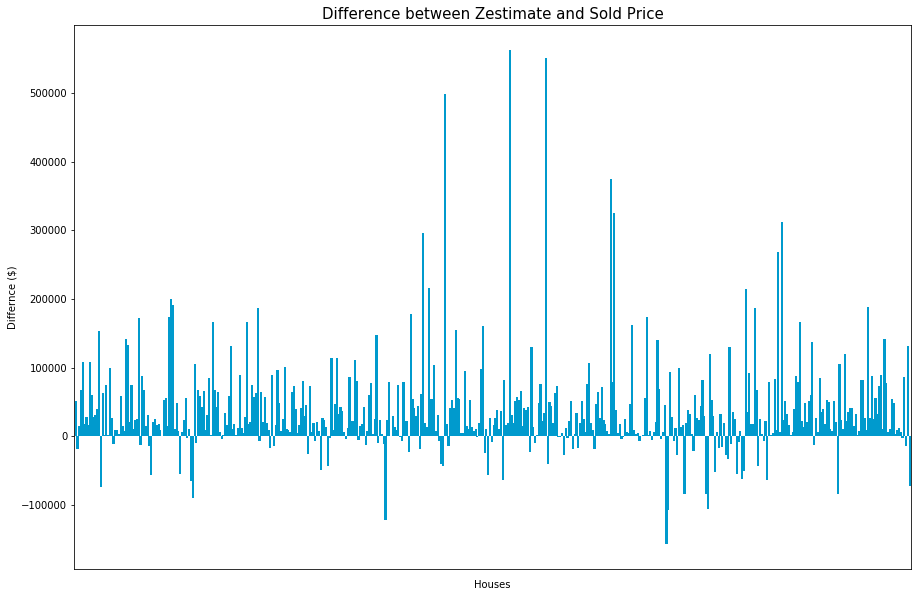

In [6]:
fig, ax = plt.subplots(figsize=(15,10))
data.loc[data['home_status']=='Sold','z_price_diff'].sort_index().plot.bar(figsize=(15,10),width=1.2, color='#009ACD')
plt.title("Difference between Zestimate and Sold Price", size=15)
plt.xlabel('Houses', size = 10)
plt.ylabel('Differnce ($)', size = 10)
ax.set_xticklabels([])
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False)      # ticks along the bottom edge are off
plt.show()

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


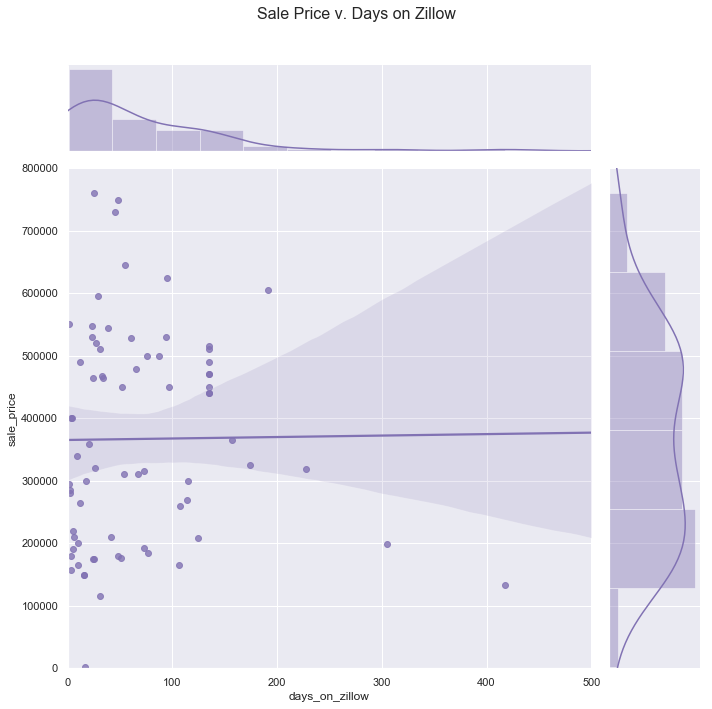

In [32]:
g = sns.jointplot("days_on_zillow", "sale_price", data=data.loc[data['days_on_zillow'] < np.std(data['days_on_zillow']),['sale_price','days_on_zillow']],
                  kind="reg",xlim=(0, 500),ylim=(0,800000), color="m",height=10)
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Sale Price v. Days on Zillow', fontsize=16)
plt.show()

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


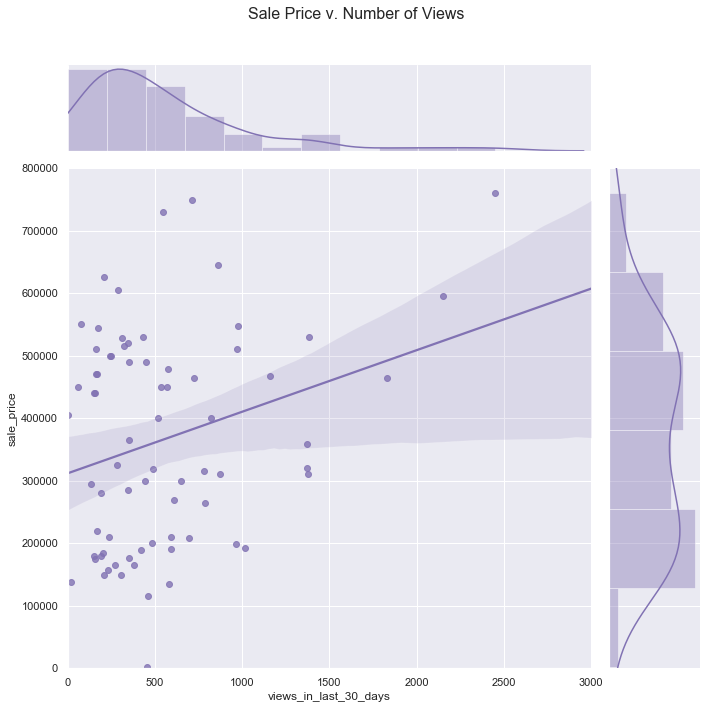

In [31]:
g = sns.jointplot("views_in_last_30_days", "sale_price", data=data.loc[data['views_in_last_30_days']< max(data['views_in_last_30_days']),['sale_price','views_in_last_30_days']],
                  kind="reg",xlim=(0, 3000),ylim=(0,800000), color="m",height=10)
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Sale Price v. Number of Views', fontsize=16)
plt.show()

# More Specific - similar houses

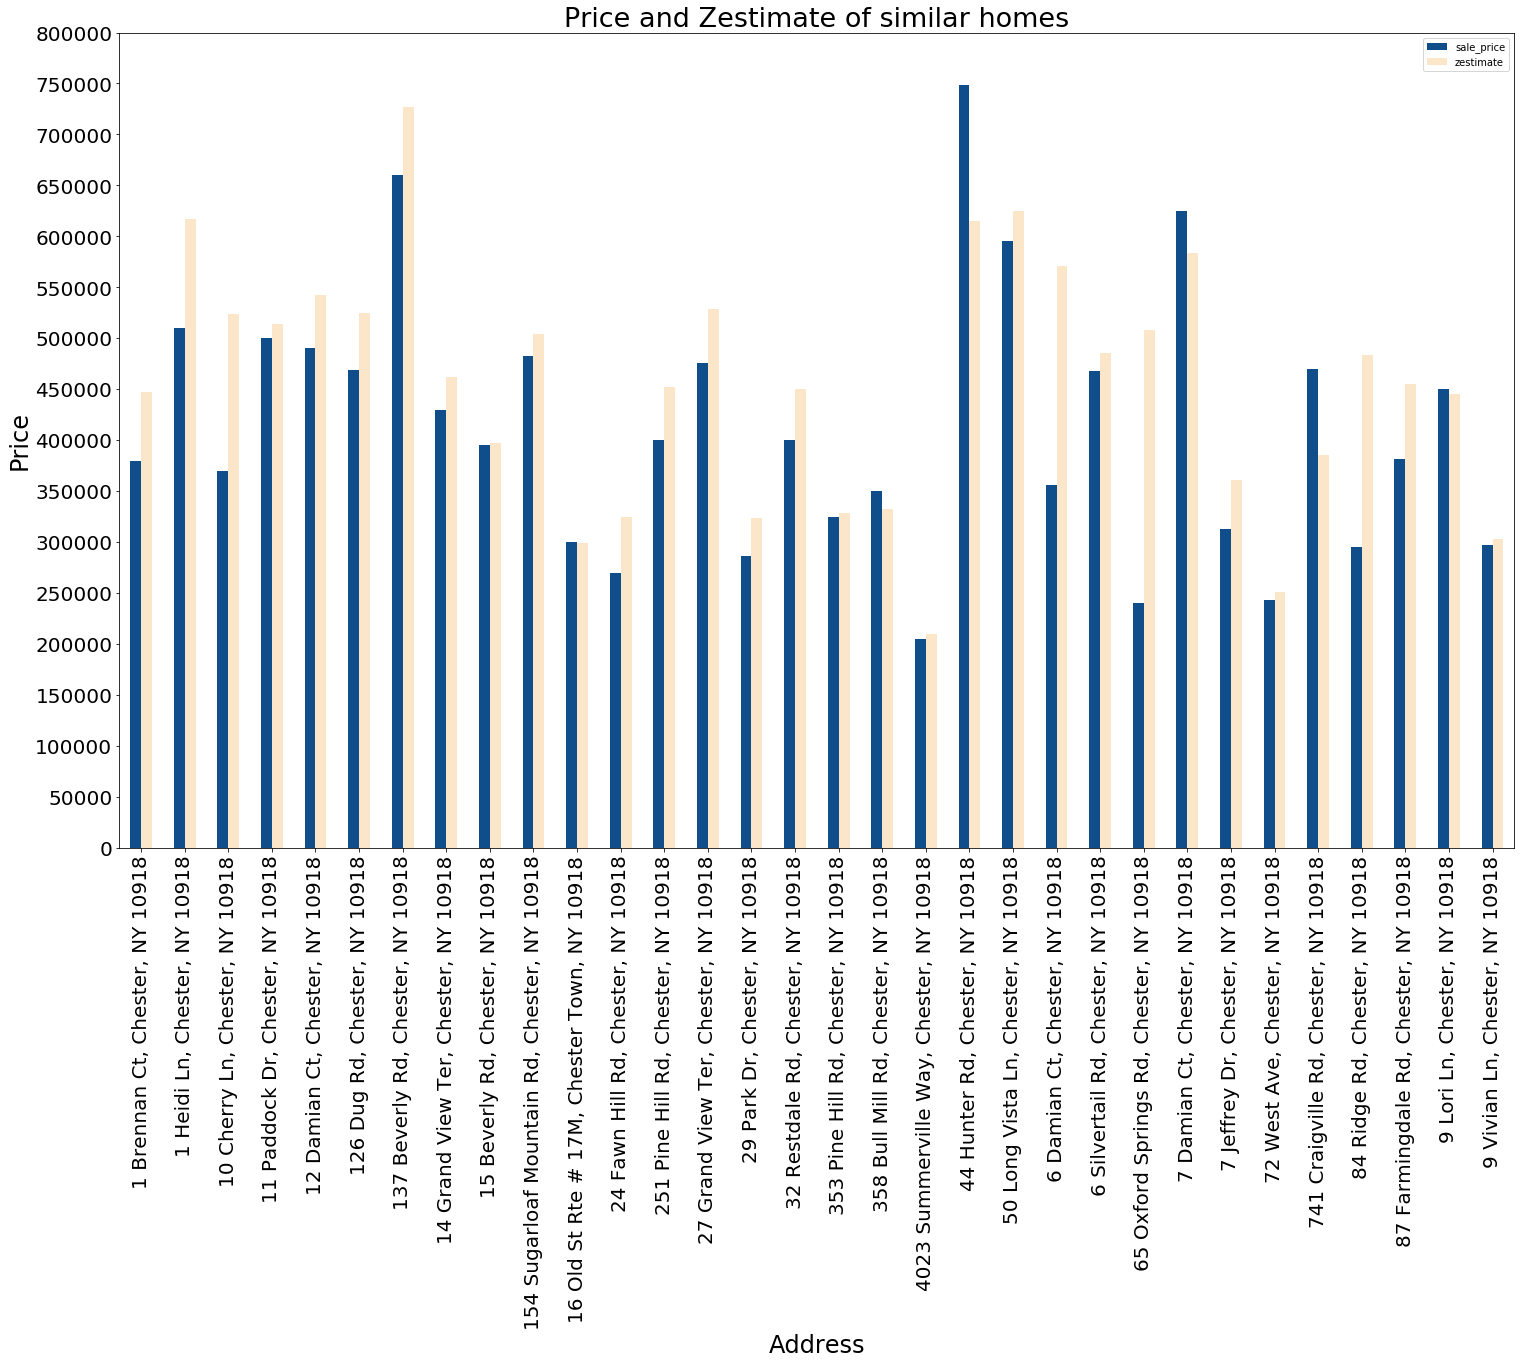

            sale_price                             zestimate                
                 count       mean     min     max       mean     min     max
home_status                                                                 
For Sale             4  530950.25  299900  749001  485886.00  299296  615441
Sold                28  394894.64  205000  660000  451468.11  209554  727216


            floor_sqft             lot_size              last_sold                    
                  mean   min   max     mean   min   max       mean       min       max
home_status                                                                           
For Sale       3387.25  2402  5000     5.74  0.36  18.4  469999.50  440000.0  499999.0
Sold           3472.68  1384  5636     4.65  0.49  27.7  387483.33  205000.0  660000.0


            price_per_sqft               days_on_zillow              views_in_last_30_days              
                      mean    min    max           mean   min    max   

In [9]:
## Creating similars with numerics
beds = 6
baths = 3
floor_sqft = 3000
lot_size = None

price_per_sqft = None

days_on_zillow = None
views_in_last_30_days = None

z_price_diff = None
sale_price = None
zestimate = None



beds_within  = 1
baths_within = 2
fl_sqft_within = 1000

similar_houses_BB_prices = data.loc[(data['bedrooms'] >= beds-beds_within)&(data['bedrooms'] <= beds+beds_within)& #]
                          (data['bathrooms'] >= baths-baths_within)&(data['bathrooms'] <= baths+baths_within) ]
                         

similar_houses_BB_prices[['sale_price','zestimate']].sort_index().plot.bar(figsize=(25,15),color=["#104E8B",'#FCE6C9'],fontsize=20)
plt.title("Price and Zestimate of similar homes", size = 27)
plt.xlabel('Address', size = 24)
plt.ylabel('Price', size = 24)
plt.yticks(np.arange(0,max(similar_houses_BB_prices['sale_price'])+100000,50000 ) )
plt.show()


similar_houses_BB_prices_grouped = similar_houses_BB_prices.groupby('home_status').agg({'sale_price':['count','mean','min','max'],
                                                                                        'zestimate':['mean','min','max']})
similar_houses_BB_stats_grouped1 = similar_houses_BB_prices.groupby('home_status').agg({
                                                           'floor_sqft':['mean','min','max'],
                                                           'lot_size':['mean','min','max'],
                                                           'last_sold':['mean','min','max']})
similar_houses_BB_stats_grouped2 = similar_houses_BB_prices.groupby('home_status').agg({
                                                            'price_per_sqft':['mean','min','max'],
                                                            'days_on_zillow':['mean','min','max'],
                                                            'views_in_last_30_days':['mean','min','max']})


similar_houses_BB_prices_grouped = similar_houses_BB_prices_grouped.round(2)
similar_houses_BB_stats_grouped1 = similar_houses_BB_stats_grouped1.round(2)
similar_houses_BB_stats_grouped2 = similar_houses_BB_stats_grouped2.round(2)
print(similar_houses_BB_prices_grouped.to_string())
print()
print()
print(similar_houses_BB_stats_grouped1.to_string())
print()
print()
print(similar_houses_BB_stats_grouped2.to_string())



In [10]:
similar_houses_BB_prices_grouped

sale_price                             zestimate                
                 count       mean     min     max       mean     min     max
home_status                                                                 
For Sale             4  530950.25  299900  749001  485886.00  299296  615441
Sold                28  394894.64  205000  660000  451468.11  209554  727216

In [11]:
similar_houses_BB_stats_grouped1

floor_sqft             lot_size              last_sold            \
                  mean   min   max     mean   min   max       mean       min   
home_status                                                                    
For Sale       3387.25  2402  5000     5.74  0.36  18.4  469999.50  440000.0   
Sold           3472.68  1384  5636     4.65  0.49  27.7  387483.33  205000.0   

                       
                  max  
home_status            
For Sale     499999.0  
Sold         660000.0

In [12]:
similar_houses_BB_stats_grouped2

price_per_sqft               days_on_zillow               \
                      mean    min    max           mean   min    max   
home_status                                                            
For Sale            155.50  125.0  189.0           77.5  48.0  115.0   
Sold                117.38   66.0  176.0            NaN   NaN    NaN   

            views_in_last_30_days                
                             mean    min    max  
home_status                                      
For Sale                    475.5  206.0  715.0  
Sold                          NaN    NaN    NaN

# Possibly look into facet grid for the above data frames?

Otherwise look into a way to display them some how